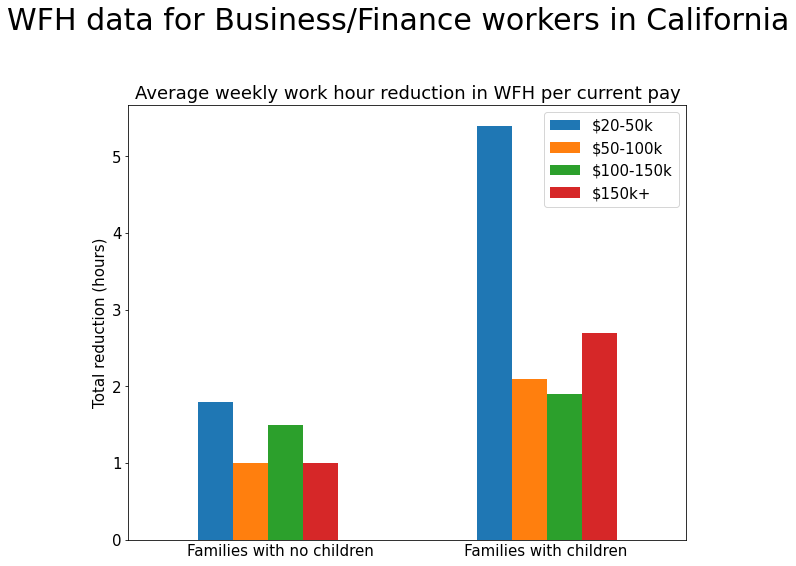

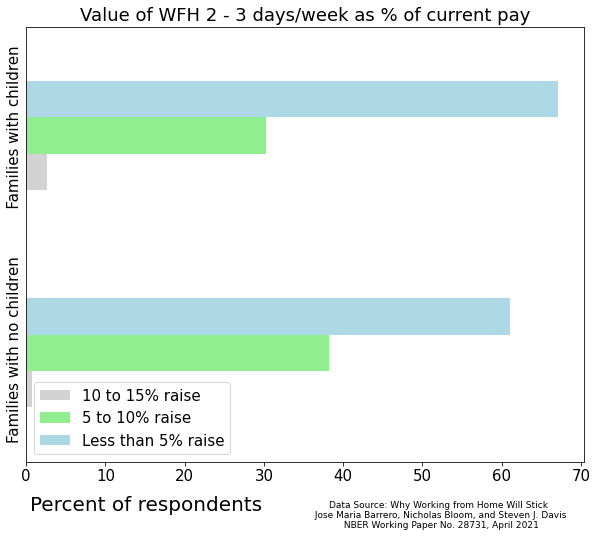

In [289]:
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 15})


WFH_data = pd.read_csv("WFHdata_February22.csv")

def WFH_in_CA(data: pd.DataFrame) -> dict:
    
    ''' 
    Computes average reduction in weekly working hours in WFH conditions 
    and value of WFH as % of current pay for business/finance professionals in California.
    
    Results are compared according to pay bracket and distinguishes professionals with and without children.
    '''
    
    cali_finance_data = data.loc[(data['occupation'] == 5) & (data['region'] == 'CA') & (data['live_children'] == 1)]
    cali_finance_data['workhours_preCOVID'].replace('', np.nan, inplace=True)
    cali_finance_data.dropna(subset=['workhours_preCOVID'], inplace=True)
    cali_finance_data['workhours_duringCOVID'].replace('', np.nan, inplace=True)
    cali_finance_data.dropna(subset=['workhours_duringCOVID'], inplace=True)
    
    cali_finance_data.loc[:,'extra_time'] = cali_finance_data['workhours_preCOVID'] - cali_finance_data['workhours_duringCOVID']
    
    avg_extratime_per_type = {}
    
    
    for i in range(1,5):
        fixed_income_table = cali_finance_data.loc[cali_finance_data['iincomebin'] == i]
        avg_extratime_per_type[i] = fixed_income_table['extra_time'].sum()/len(fixed_income_table.index)
        
        
    avg_extratime_per_income = {}    
    avg_extratime_per_income['$20-50k'] = round(avg_extratime_per_type[1], 1)
    avg_extratime_per_income['$50-100k'] = round(avg_extratime_per_type[2], 1)
    avg_extratime_per_income['$100-150k'] = round(avg_extratime_per_type[3], 1)
    avg_extratime_per_income['$150k+'] = round(avg_extratime_per_type[4], 1) 

    
    cali_finance_data['wfh_feel_detailed'].replace('', np.nan, inplace=True)
    cali_finance_data.dropna(subset=['wfh_feel_detailed'], inplace=True)
 
    
    l = len(cali_finance_data)
    percentage = {}

    percentage["10 to 15% raise"] = 100*len(cali_finance_data.loc[(cali_finance_data['wfh_feel_detailed'] > 10) & (cali_finance_data['wfh_feel_detailed'] <= 15)])/l
    percentage["5 to 10% raise"] = 100*len(cali_finance_data.loc[(cali_finance_data['wfh_feel_detailed'] > 5) & (cali_finance_data['wfh_feel_detailed'] <= 10)])/l
    percentage["Less than 5% raise"] = 100*len(cali_finance_data.loc[(cali_finance_data['wfh_feel_detailed'] > 0) & (cali_finance_data['wfh_feel_detailed'] <= 5)])/l

    

    #Computes the same quantities as before, for families with no children
    
    cali_finance_data = data.loc[(data['occupation'] == 5) & (data['region'] == 'CA') & (data['live_children'] > 1)]
    cali_finance_data['workhours_preCOVID'].replace('', np.nan, inplace=True)
    cali_finance_data.dropna(subset=['workhours_preCOVID'], inplace=True)
    cali_finance_data['workhours_duringCOVID'].replace('', np.nan, inplace=True)
    cali_finance_data.dropna(subset=['workhours_duringCOVID'], inplace=True)
    
    cali_finance_data.loc[:,'extra_time'] = cali_finance_data['workhours_preCOVID'] - cali_finance_data['workhours_duringCOVID']
    
    avg_extratime_per_type = {}
    
    
    for i in range(1,5):
        fixed_income_table = cali_finance_data.loc[cali_finance_data['iincomebin'] == i]
        avg_extratime_per_type[i] = fixed_income_table['extra_time'].sum()/len(fixed_income_table.index)
        
        
    avg_extratime_per_income_nc = {}    
    avg_extratime_per_income_nc['$20-50k'] = round(avg_extratime_per_type[1], 1)
    avg_extratime_per_income_nc['$50-100k'] = round(avg_extratime_per_type[2], 1)
    avg_extratime_per_income_nc['$100-150k'] = round(avg_extratime_per_type[3], 1)
    avg_extratime_per_income_nc['$150k+'] = round(avg_extratime_per_type[4], 1) 
    
    
    cali_finance_data['wfh_feel_detailed'].replace('', np.nan, inplace=True)
    cali_finance_data.dropna(subset=['wfh_feel_detailed'], inplace=True)
    
    
    
    
    
    df = pd.DataFrame([avg_extratime_per_income, avg_extratime_per_income_nc])
    
    df.plot.bar(xlabel="Families with no children" + 19*" " + "Families with children", ylabel="Total reduction (hours)", figsize=(10, 8))
    plt.xticks([])
    plt.suptitle("WFH data for Business/Finance workers in California", y=1.05, fontsize=30)
    plt.title("Average weekly work hour reduction in WFH per current pay")
    plt.savefig('../average_weekly_workhour_reduction.png')
    plt.show()
    

    
    l = len(cali_finance_data)
    percentage_nc = {}

    percentage_nc["10 to 15% raise"] = 100*len(cali_finance_data.loc[(cali_finance_data['wfh_feel_detailed'] > 10) & (cali_finance_data['wfh_feel_detailed'] <= 15)])/l
    percentage_nc["5 to 10% raise"] = 100*len(cali_finance_data.loc[(cali_finance_data['wfh_feel_detailed'] > 5) & (cali_finance_data['wfh_feel_detailed'] <= 10)])/l
    percentage_nc["Less than 5% raise"] = 100*len(cali_finance_data.loc[(cali_finance_data['wfh_feel_detailed'] > 0) & (cali_finance_data['wfh_feel_detailed'] <= 5)])/l
    
    
    
    df2 = pd.DataFrame([percentage, percentage_nc])
    
    
    
    df2.plot.barh(xlabel="Families with no children" + 10*" " + "Families with children", ylabel="Percent of respondents", figsize=(10, 8), color = ["lightgray", "lightgreen", "lightblue"])
    plt.yticks([])
    plt.title("Value of WFH 2 - 3 days/week as % of current pay")
    plt.figtext(0.13, 0.04, "Percent of respondents", fontsize=20)
    plt.figtext(0.7, 0.01, "Data Source: Why Working from Home Will Stick \n Jose Maria Barrero, Nicholas Bloom, and Steven J. Davis \n NBER Working Paper No. 28731, April 2021", ha="center", fontsize=9)
    plt.savefig('../value_WFH_per_current_pay.png')
    plt.show()
    

    


#Although I didn't plot this here, one can see from the data that even though the lower income bracket has had the highest
#reduction in hours, it only values WFH at 5-10% of pay regardless of children, so it barely influences the second graph.

#On the other hand, the highest income bracket values WFH at 5-10% without children and at 10-15% with children.
#I would like to think that the explanation is that parents put a high value in time spent with their children, but only the highest bracket can
#afford a large pay cut. It is likely this can be directly verified by further digging into the available data.
  
      
    
WFH_in_CA(WFH_data)  
    
    